In [3]:
# importing libraries
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_rows', 40000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# datetime
from datetime import datetime
from scipy.stats import norm
import re

In [5]:
MMM_df = pd.read_csv('/content/drive/MyDrive/latest data/ConsumerElectronics.csv')

MMM_df.head()

product_list = pd.read_excel('Media data and other information.xlsx', sheet_name='Product List')

product_list.columns.values[1]='product_analytic_vertical'

product_list.drop(product_list.columns[0], axis=1, inplace = True)

product_list.head()

media_investment = pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment', skiprows=2)

media_investment.drop(media_investment.columns[0], axis=1, inplace = True)

media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [6]:
net_promoter_score = pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score', \
                              skiprows=0)

net_promoter_score.columns.values[0]='score'

net_promoter_score

!pip install python-docx
import pandas as pd
import io
import csv
from docx import Document

def read_docx_tables(filename, tab_id=None, **kwargs):
    """
    parse table(s) from a Word Document (.docx) into Pandas DataFrame(s)

    Parameters:
        filename:   file name of a Word Document

        tab_id:     parse a single table with the index: [tab_id] (counting from 0).
                    When [None] - return a list of DataFrames (parse all tables)

        kwargs:     arguments to pass to `pd.read_csv()` function

    Return: a single DataFrame if tab_id != None or a list of DataFrames otherwise
    """
    def read_docx_tab(tab, **kwargs):
        vf = io.StringIO()
        writer = csv.writer(vf)
        for row in tab.rows:
            writer.writerow(cell.text for cell in row.cells)
        vf.seek(0)
        return pd.read_csv(vf, **kwargs)

    doc = Document(filename)
    if tab_id is None:
        return [read_docx_tab(tab, **kwargs) for tab in doc.tables]
    else:
        try:
            return read_docx_tab(doc.tables[tab_id], **kwargs)
        except IndexError:
            print('Error: specified [tab_id]: {}  does not exist.'.format(tab_id))
            raise

dfs = read_docx_tables('Product Details.docx')

dfs[0]

,super_category,category,sub_category,vertical
0,CE,Camera,Camera,Camcorders
1,CE,Camera,Camera,DSLR
2,CE,Camera,Camera,Instant Cameras
3,CE,Camera,Camera,Point & Shoot
4,CE,Camera,Camera,SportsAndAction
5,CE,CameraAccessory,CameraAccessory,Binoculars
6,CE,CameraAccessory,CameraAccessory,CameraAccessory
7,CE,CameraAccessory,CameraAccessory,CameraBag
8,CE,CameraAccessory,CameraAccessory,CameraBattery
9,CE,CameraAccessory,CameraAccessory,CameraBatteryCharger


In [7]:
# excluding extra rows and columns

product_details = pd.DataFrame(dfs[0])

product_details.drop(product_details.columns[0], axis=1, inplace = True)

product_details.head()

MMM_df.head()

MMM_df.dtypes

fsn_id                              object
order_date                          object
Year                                 int64
Month                                int64
order_id                           float64
order_item_id                      float64
gmv                                 object
units                                int64
deliverybdays                       object
deliverycdays                       object
s1_fact.order_payment_type          object
sla                                  int64
cust_id                             object
pincode                             object
product_analytic_super_category     object
product_analytic_category           object
product_analytic_sub_category       object
product_analytic_vertical           object
product_mrp                          int64
product_procurement_sla              int64
dtype: object

In [8]:
# String to datetime

MMM_df['order_date'] =  pd.to_datetime(MMM_df['order_date'], format='%Y-%m-%d %H:%M:%S')

# Int to string

MMM_df[['order_id','order_item_id']] = MMM_df[['order_id','order_item_id']].astype(object)

# Int to string

MMM_df[['Year','Month']] = MMM_df[['Year','Month']].astype(str)

MMM_df['deliverybdays'] = pd.to_numeric(MMM_df['deliverybdays'], errors='coerce')
MMM_df['deliverybdays'].fillna(value=0, inplace=True)

MMM_df['deliverycdays'] = pd.to_numeric(MMM_df['deliverycdays'], errors='coerce')
MMM_df['deliverycdays'].fillna(value=0, inplace=True)

# String to int

MMM_df['gmv'] = pd.to_numeric(MMM_df['gmv'], errors='coerce')

MMM_df.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                       object
Month                                      object
order_id                                   object
order_item_id                              object
gmv                                       float64
units                                       int64
deliverybdays                             float64
deliverycdays                             float64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


In [9]:
# Unique value frequencies

unique_values = pd.DataFrame(MMM_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

unique_values['dtype'] = pd.DataFrame(MMM_df.dtypes)

unique_values

initial_shape = MMM_df.shape
initial_shape

# Instances where GMV values are greater than MRP * units which is incorrect

print(MMM_df.loc[MMM_df['product_mrp'] * MMM_df['units'] < MMM_df['gmv']].shape[0])

print(round(100*(MMM_df.loc[MMM_df['product_mrp'] * MMM_df['units'] < MMM_df['gmv']].shape[0] / MMM_df.shape[0]), 2))

38569
2.34


In [10]:
# update column based on another column
MMM_df.product_mrp = np.where(MMM_df['product_mrp'] < MMM_df['gmv'] / MMM_df['units'], \
                                   MMM_df['gmv'] / MMM_df['units'], MMM_df['product_mrp'])

MMM_df.shape

# Instances where GMV values are greater than MRP * units which is incorrect

print(MMM_df.loc[MMM_df['product_mrp'] * MMM_df['units'] < MMM_df['gmv']].shape[0])

print(round(100*(MMM_df.loc[MMM_df['product_mrp'] * MMM_df['units'] < MMM_df['gmv']].shape[0] / MMM_df.shape[0]), 2))

print(MMM_df.loc[MMM_df['gmv'] < 0].shape[0])

print(round(100*(MMM_df.loc[MMM_df['gmv'] < 0].shape[0]/MMM_df.shape[0]), 2))

print(MMM_df.loc[MMM_df['product_mrp'] < 0].shape[0])

print(round(100*(MMM_df.loc[MMM_df['product_mrp'] < 0].shape[0]/MMM_df.shape[0]), 2))

print(MMM_df.loc[MMM_df['units'] <= 0].shape[0])

print(round(100*(MMM_df.loc[MMM_df['units'] <= 0].shape[0]/MMM_df.shape[0]), 2))

print(MMM_df.loc[MMM_df['deliverybdays'] < 0].shape[0])
print(round(100*(MMM_df.loc[MMM_df['deliverybdays'] < 0].shape[0]/MMM_df.shape[0]),4))

print(MMM_df.loc[MMM_df['deliverycdays'] < 0].shape[0])
print(round(100*(MMM_df.loc[MMM_df['deliverycdays'] < 0].shape[0]/MMM_df.shape[0]),4))

MMM_df = MMM_df.loc[(MMM_df['deliverybdays'] >= 0) & (MMM_df['deliverycdays'] >= 0)]

MMM_df.reset_index(drop=True, inplace=True)

MMM_df.shape

print(MMM_df.loc[MMM_df['product_procurement_sla'] < 0].shape[0])

print(round(100*(MMM_df.loc[MMM_df['product_procurement_sla'] < 0].shape[0]/MMM_df.shape[0]),4))

MMM_df = MMM_df.loc[(MMM_df['product_procurement_sla'] >= 0)]

MMM_df.reset_index(drop=True, inplace=True)

MMM_df.shape

0
0.0
0
0.0
0
0.0
0
0.0
38
0.0023
39
0.0024
75986
4.6086


(1572799, 20)

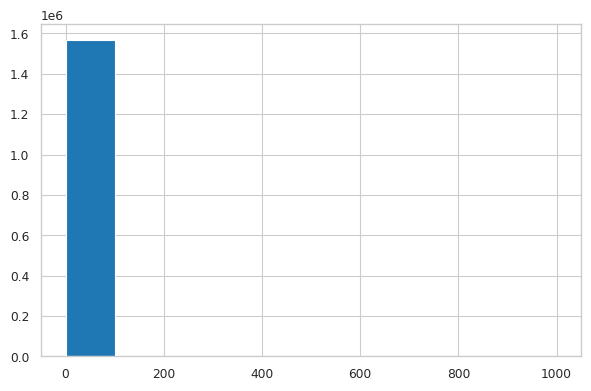

4745
0.3017
<class 'pandas.core.frame.DataFrame'>
Index: 1568054 entries, 0 to 1572798
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   fsn_id                           1568054 non-null  object        
 1   order_date                       1568054 non-null  datetime64[ns]
 2   Year                             1568054 non-null  object        
 3   Month                            1568054 non-null  object        
 4   order_id                         1568054 non-null  object        
 5   order_item_id                    1568054 non-null  object        
 6   gmv                              1563535 non-null  float64       
 7   units                            1568054 non-null  int64         
 8   deliverybdays                    1568054 non-null  float64       
 9   deliverycdays                    1568054 non-null  float64       
 10  s1_fact.order_payment_t

['fsn_id',
 'Year',
 'Month',
 'order_id',
 'order_item_id',
 's1_fact.order_payment_type',
 'cust_id',
 'pincode',
 'product_analytic_super_category',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical']

In [11]:
MMM_df[['product_procurement_sla']].describe().T

# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(6, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

MMM_df.product_procurement_sla.hist()

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

MMM_df.product_procurement_sla.value_counts()

print(MMM_df.loc[MMM_df['product_procurement_sla'] >= 1000].shape[0])

print(round(100*(MMM_df.loc[MMM_df['product_procurement_sla'] >= 1000].shape[0]/MMM_df.shape[0]),4))

#Retaining rows where the sla is less than 1000

MMM_df = MMM_df.loc[(MMM_df['product_procurement_sla'] < 1000)]
MMM_df.head()

MMM_df.shape

MMM_df.info()

cat_cols = [cname for cname in MMM_df.columns if MMM_df[cname].dtype == "object"]

cat_cols

In [12]:
# Filtering the string columns

cat_cols = ['fsn_id',
 's1_fact.order_payment_type',
 'product_analytic_super_category',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical']

for col in cat_cols:
    MMM_df[col] = MMM_df[col].str.lower()

cat_cols = [cname for cname in MMM_df.columns if MMM_df[cname].dtype == "object"]

MMM_df[cat_cols].describe()

# Checking only those columns whose cardinality is less

selected_cat_cols = ['s1_fact.order_payment_type', 'product_analytic_super_category', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical']

for col in selected_cat_cols:
    print('\n################################')
    print('Unique values of ' + str(col))
    print('################################')
    print(pd.Series(MMM_df[col].unique()).sort_values(ascending=False))

MMM_df.shape

print(MMM_df.duplicated().value_counts()[1])

print(round(100*(MMM_df.duplicated().value_counts()[1]/MMM_df.shape[0]),4))

MMM_df.drop_duplicates(keep='first', inplace=True)
MMM_df.shape

MMM_df.duplicated().value_counts()

# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(MMM_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(MMM_df.isnull().sum()/MMM_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1).head()

MMM_df.replace(' ', np.nan, inplace = True)

# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(MMM_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(MMM_df.isnull().sum()/MMM_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
MMM_df = MMM_df[~pd.isnull(MMM_df['gmv'])]
org_shape = MMM_df.shape
org_shape

# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(MMM_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(MMM_df.isnull().sum()/MMM_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

MMM_df.dtypes

MMM_df.loc[(MMM_df['order_date'].dt.floor("d") < '2015-07-01') | (MMM_df['order_date'].dt.floor("d") >= '2016-07-01')].shape

MMM_df = MMM_df.loc[(MMM_df['order_date'].dt.floor("d") >= '2015-07-01') & (MMM_df['order_date'].dt.floor("d") < '2016-07-01')]
MMM_df.shape

Max = pd.DataFrame(MMM_df[['order_date']].max().rename('Max'))
Min = pd.DataFrame(MMM_df[['order_date']].min().rename('Min'))

pd.concat([Min, Max], axis=1)

# Creating a new column into a specific position in a DataFrame
loc_index = MMM_df.columns.get_loc('Month') + 1
MMM_df.insert(loc=loc_index,column='Week',value=MMM_df['order_date'].dt.strftime("%V"))

MMM_df['Year'] = MMM_df['Year'].astype('str')
MMM_df.head()

# Checking the combinations for any discrepancies

MMM_df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

# Updating the year as 2015 for the week whose week# is 53 but belongs to 2016 for consistency with the other data sets

# Updating the month as 12 for the above rows for consistency

# Dropping rows (less in number) with week# 27 as it belongs to the weeks in June 2015

MMM_df.loc[(MMM_df.Year == '2016') & (MMM_df.Week == '53'), 'Year'] = '2015'

MMM_df.loc[(MMM_df.Year == '2015') & (MMM_df.Week == '53'), 'Month'] = 12

MMM_df.drop(MMM_df[MMM_df['Week'] == '27'].index, inplace = True)

MMM_df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

MMM_df.info()


################################
Unique values of s1_fact.order_payment_type
################################
1    prepaid
0        cod
dtype: object

################################
Unique values of product_analytic_super_category
################################
0    ce
dtype: object

################################
Unique values of product_analytic_category
################################
1        gaminghardware
3             gamecddvd
2    entertainmentsmall
0       cameraaccessory
4                camera
dtype: object

################################
Unique values of product_analytic_sub_category
################################
12           tvvideosmall
2                 speaker
10            hometheatre
3               homeaudio
9           gamingconsole
1         gamingaccessory
13    gamemembershipcards
7                    game
4           camerastorage
0         cameraaccessory
8                  camera
6          audiomp3player
11         audioaccessory
5       amplifi

In [13]:
# Dropping Columns with Single Value or all Different Values

count_df = pd.DataFrame(MMM_df.apply(lambda x: len(x.value_counts()), axis=0), columns=['Count'])

drop_columns = list(count_df.loc[(count_df['Count']==1) | (count_df['Count']==len(MMM_df.index))].index)

print('Dropping these columns => {}'.format(drop_columns))

MMM_df.drop(drop_columns, axis=1, inplace=True)

# Dropping Columns which are insignificant to the analysis

drop_columns = ['fsn_id', 'order_id', 'order_item_id', 'cust_id']

MMM_df.drop(drop_columns, axis=1, inplace=True)

MMM_df.head()

# Creating a new column into a specific position in a DataFrame
loc_index = MMM_df.columns.get_loc('gmv') + 1
MMM_df.insert(loc=loc_index,column='list_price',value = MMM_df['gmv'] / MMM_df['units'])
MMM_df.head()

MMM_df.loc[MMM_df['units'] != 1][['gmv','list_price','product_mrp','units']].head()

MMM_df['payday_flag'] = MMM_df['order_date'].apply(lambda x:1 if x.strftime('%d') in ('14','15','16','30','31','1','2') else 0)
MMM_df.head()

Dropping these columns => ['product_analytic_super_category']


,order_date,Year,Month,Week,gmv,list_price,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag
0,2015-10-17 15:11:54,2015,10,42,6400.0,6400.0,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0
1,2015-10-19 10:07:22,2015,10,43,6900.0,6900.0,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0
2,2015-10-20 15:45:56,2015,10,43,1990.0,1990.0,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0
3,2015-10-14 12:05:15,2015,10,42,1690.0,1690.0,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1
4,2015-10-17 21:25:03,2015,10,42,1618.0,1618.0,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0


#############
order_date
#############


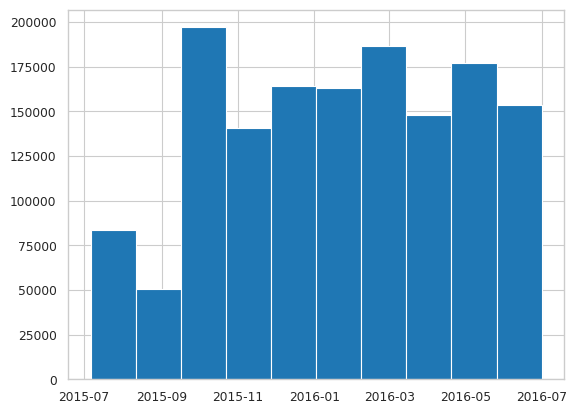

#############
gmv
#############


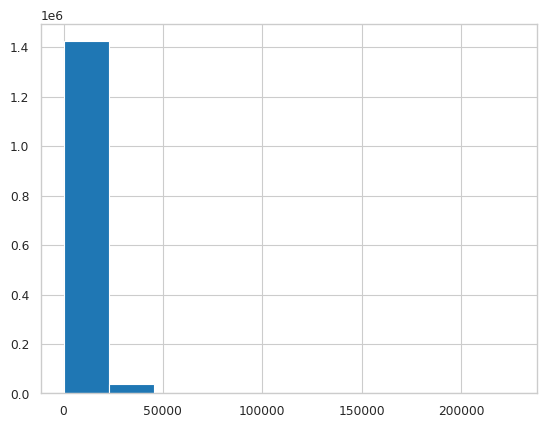

#############
list_price
#############


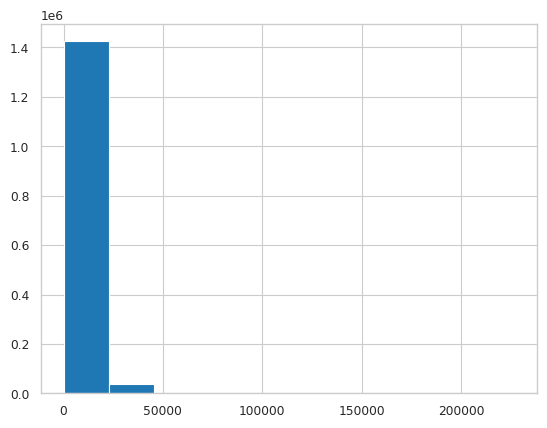

#############
Discount%
#############


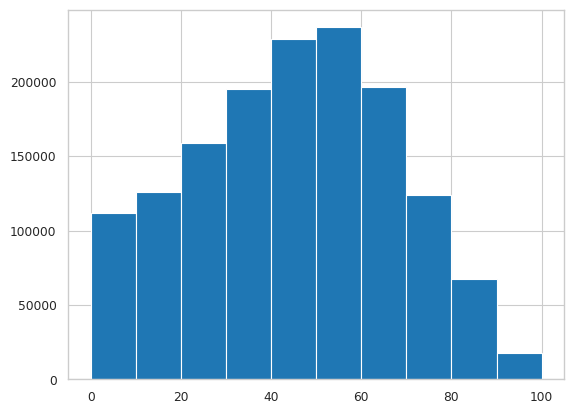

#############
units
#############


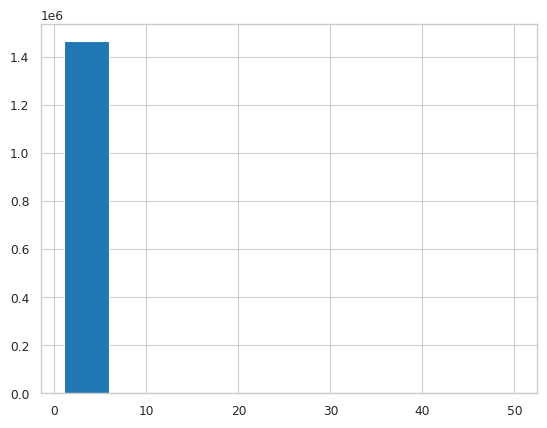

#############
deliverybdays
#############


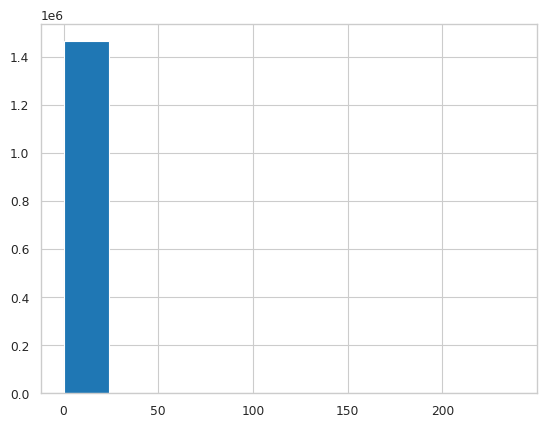

#############
deliverycdays
#############


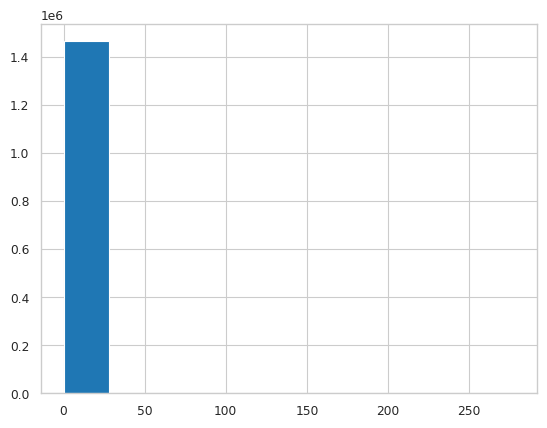

#############
sla
#############


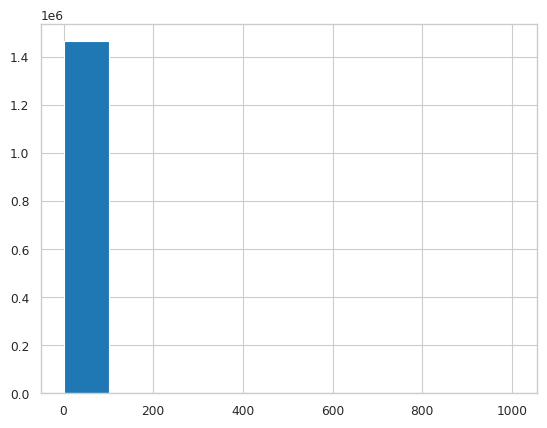

#############
product_mrp
#############


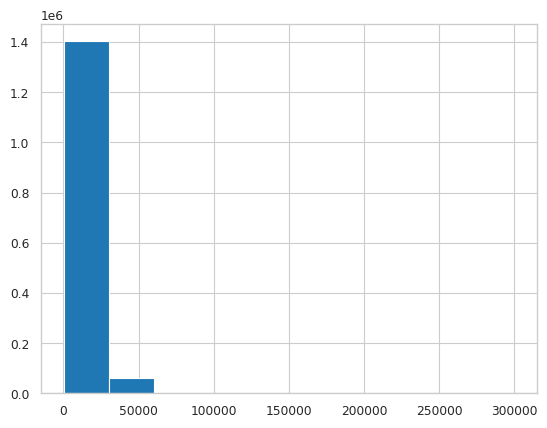

#############
product_procurement_sla
#############


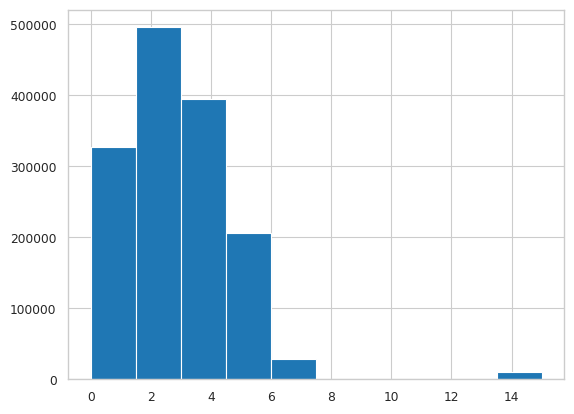

#############
payday_flag
#############


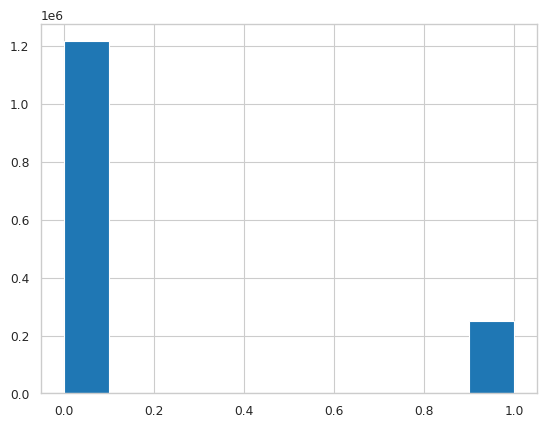

#############
occassion_flag
#############


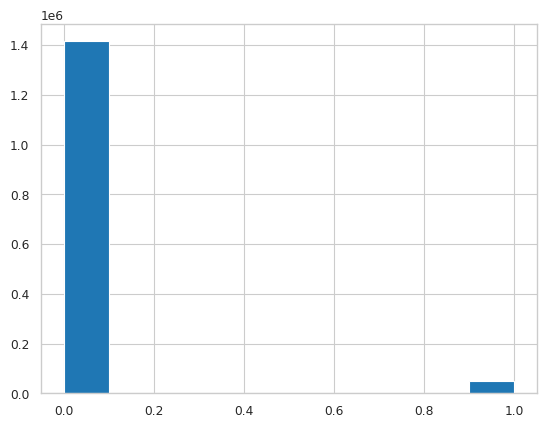

In [14]:
def holidayflg(ord_date):
    if ord_date.strftime('%Y') == 2015:
        if ord_date.strftime('%m') == '07' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '08' and ord_date.strftime('%d') == '03':
            return 1
        elif ord_date.strftime('%m') == '09' and ord_date.strftime('%d') == '07':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '12':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '31':
            return 1
        elif ord_date.strftime('%m') == '11' and ord_date.strftime('%d') == '11':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '26':
            return 1
        else:
            return 0
    else:
        if ord_date.strftime('%m') == '01' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '15':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '14':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') =='29':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '17':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '28':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '08':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '23':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '19':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '21':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '24':
            return 1
        else:
            return 0

MMM_df['occassion_flag'] = MMM_df['order_date'].apply(lambda x:holidayflg(x))
MMM_df.head()

pd.DataFrame(MMM_df['gmv']).describe(percentiles=[.70,.80,.90]).T

MMM_df['gmv'].quantile(.8)

MMM_df['product_type'] = MMM_df['gmv'].apply(lambda x:'luxury' if x >= 2450 else 'mass_market')
MMM_df.head()

# Creating a new column into a specific position in a DataFrame
col_loc = MMM_df.columns.get_loc('list_price') + 1
MMM_df.insert(loc=col_loc, column='Discount%', value = \
               round(100*((MMM_df['product_mrp'] - MMM_df['list_price']) / MMM_df['product_mrp']),2))
MMM_df.head()

MMM_df.describe().T

for col in MMM_df.describe().columns:
    print('#############')
    print(col)
    print('#############')
    MMM_df[col].hist()
    plt.show()

cat_var = [cname for cname in MMM_df.columns if
                                MMM_df[cname].dtype == "object"]

MMM_df[cat_var].describe().T

MMM_df.head()

MMM_df.dtypes

# Function to plot the distribution plot of the numeric variable list

numeric_variables=['gmv','list_price','Discount%','deliverybdays','deliverycdays','sla','product_mrp','product_procurement_sla']

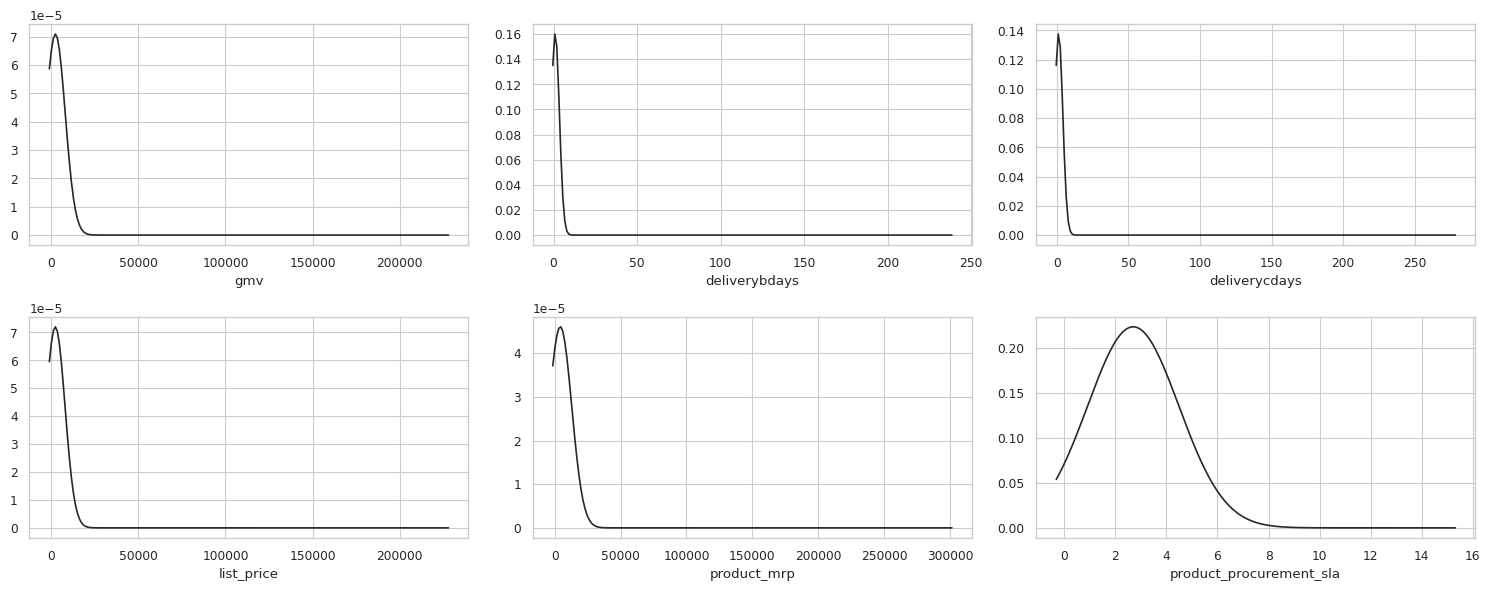

{1: [2, 3, 4, 5], 2: [6, 7, 8, 9], 3: [10, 11, 12, 13, 14], 4: [15, 16, 17, 18], 5: [19, 20, 21, 22], 6: [23, 24, 25, 26, 27], 7: [28, 29, 30, 31], 8: [32, 33, 34, 35, 36], 9: [37, 38, 39, 40], 10: [41, 42, 43, 44], 11: [45, 46, 47, 48, 49], 12: [50, 51, 52, 53]}

{'Jan': [2, 3, 4, 5], 'Feb': [6, 7, 8, 9], 'Mar': [10, 11, 12, 13, 14], 'Apr': [15, 16, 17, 18], 'May': [19, 20, 21, 22], 'Jun': [23, 24, 25, 26, 27], 'Jul': [28, 29, 30, 31], 'Aug': [32, 33, 34, 35, 36], 'Sep': [37, 38, 39, 40], 'Oct': [41, 42, 43, 44], 'Nov': [45, 46, 47, 48, 49], 'Dec': [50, 51, 52, 53]}

{1: [1, 2, 3, 4], 2: [5, 6, 7, 8, 9], 3: [10, 11, 12, 13], 4: [14, 15, 16, 17], 5: [18, 19, 20, 21, 22], 6: [23, 24, 25, 26], 7: [27, 28, 29, 30], 8: [31, 32, 33, 34, 35], 9: [36, 37, 38, 39], 10: [40, 41, 42, 43, 44], 11: [45, 46, 47, 48], 12: [49, 50, 51, 52]}

{'Jan': [1, 2, 3, 4], 'Feb': [5, 6, 7, 8, 9], 'Mar': [10, 11, 12, 13], 'Apr': [14, 15, 16, 17], 'May': [18, 19, 20, 21, 22], 'Jun': [23, 24, 25, 26], 'Jul': [27,

In [15]:
#Function to plot the distribution plot of the numeric variable list
def distplots(var_list):
    plt.figure(figsize=(15,6))
    for var in var_list:
        plt.subplot(2,3,var_list.index(var)+1)
        sns.distplot(MMM_df[var], fit=norm, kde=False, hist=False)
        #sns.boxplot(y=var,palette='cubehelix', data=MMM_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()

distplots(num_col)

MMM_df.isnull().values.any()

import calendar

def WeekFinderFromYear(year):
        """ will return all the week from selected year """

        import datetime

        WEEK = {'MONDAY':0,'TUESDAY':1,'WEDNESDAY':2,'THURSDAY':3,'FRIDAY':4,'SATURDAY':5,'SUNDAY':6}
        MONTH = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,'APRIL':4,'MAY':5,'JUNE':6,'JULY':7,'AUGUST':8,'SEPTEMBER':9,'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12}

        year = int(year)
        month = MONTH['JANUARY']
        day = WEEK['MONDAY']

        dt = datetime.date(year, month, 1)
        dow_lst = []

        while dt.weekday() != day:
            dt = dt + datetime.timedelta(days = 1)

        lst_month = MONTH.values()

        for mont in lst_month:
         while dt.month == mont:
            dow_lst.append(dt)
            dt = dt + datetime.timedelta(days=7)

        month_number_week = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
        month_name_week = {'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[], 'Dec':[]}

        for each in dow_lst:
            month_number_week[each.month].append(each.isocalendar()[1])
            month_name_week[calendar.month_abbr[each.month]].append(each.isocalendar()[1])

        return month_number_week, month_name_week

dict_number_2015, dict_name_2015 = WeekFinderFromYear(2015)
print(dict_number_2015)
print()
print(dict_name_2015)

print()

dict_number_2016, dict_name_2016 = WeekFinderFromYear(2016)
print(dict_number_2016)
print()
print(dict_name_2016)

num_weeks_2015 = 0
num_weeks_2016 = 0

for i in dict_number_2015:
    if i >= 7:
        num_weeks_2015 += len(dict_number_2015[i])

for i in dict_number_2016:
    if i <= 6:
        num_weeks_2016 += len(dict_number_2016[i])

total_weeks = num_weeks_2015 + num_weeks_2016
total_weeks

media_investment.head()

# Imputing nulls with 0

media_investment['Radio'].fillna(value=0, inplace=True)
media_investment['Other'].fillna(value=0, inplace=True)

media_investment.head()

# Temp DataFrame

temp_media_investment = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'])

temp_media_investment.head()

i = 0

In [16]:
for index, row in media_investment.iterrows():

    if row.Year == 2015:

        num_weeks = len(dict_number_2015[row.Month])

        for week in dict_number_2015[row.Month]:

            temp_media_investment.iloc[i].Year = row.Year
            temp_media_investment.iloc[i].Month = row.Month
            temp_media_investment.iloc[i]['Week'] = week
            temp_media_investment.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_media_investment.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_media_investment.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)

            i+=1

    elif row.Year == 2016:

        num_weeks = len(dict_number_2016[row.Month])

        for week in dict_number_2016[row.Month]:

            temp_media_investment.iloc[i].Year = row.Year
            temp_media_investment.iloc[i].Month = row.Month
            temp_media_investment.iloc[i]['Week'] = week
            temp_media_investment.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_media_investment.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_media_investment.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)

            i+=1

temp_media_investment.head()

temp_media_investment['Week'] = temp_media_investment['Week'].astype('str')

media_investment = temp_media_investment

media_investment.head()

# Checking for duplicates
media_investment.duplicated('Week').value_counts()

# Checking for nulls
media_investment.isnull().values.any()

# Dropping Year and Month columns as we won't be needing them anymore

del media_investment['Year']
del media_investment['Month']
media_investment.head()

original_col = media_investment.columns[1:]
original_col

Index(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'], dtype='object')

In [17]:
def EMA_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_EMA_'+str(n),value=df[i].ewm(span=n, adjust=False).mean())
    return df

media_investment = EMA_variables(media_investment,original_col,8)
media_investment.head()

def SMA_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_SMA_'+str(n),value=df[i].rolling(window=n).mean())
    return df

media_investment = SMA_variables(media_investment,original_col,5)
media_investment.head()

media_investment = SMA_variables(media_investment,original_col,3)
media_investment.head()

,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8
0,28,4.265,NaN,NaN,4.265000,0.054,NaN,NaN,0.054000,0.633,NaN,NaN,0.633000,1.854,NaN,NaN,1.854000,0.0,NaN,NaN,0.0,0.332,NaN,NaN,0.332,0.137,NaN,NaN,0.137000,1.256,NaN,NaN,1.256000,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
1,29,4.265,NaN,NaN,4.265000,0.054,NaN,NaN,0.054000,0.633,NaN,NaN,0.633000,1.854,NaN,NaN,1.854000,0.0,NaN,NaN,0.0,0.332,NaN,NaN,0.332,0.137,NaN,NaN,0.137000,1.256,NaN,NaN,1.256000,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
2,30,4.265,4.265,NaN,4.265000,0.054,0.054000,NaN,0.054000,0.633,0.633000,NaN,0.633000,1.854,1.854,NaN,1.854000,0.0,0.0,NaN,0.0,0.332,0.332,NaN,0.332,0.137,0.137000,NaN,0.137000,1.256,1.256,NaN,1.256000,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0
3,31,4.265,4.265,NaN,4.265000,0.054,0.054000,NaN,0.054000,0.633,0.633000,NaN,0.633000,1.854,1.854,NaN,1.854000,0.0,0.0,NaN,0.0,0.332,0.332,NaN,0.332,0.137,0.137000,NaN,0.137000,1.256,1.256,NaN,1.256000,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0
4,32,1.013,3.181,3.6146,3.542333,0.001,0.036333,0.0434,0.042222,0.256,0.507333,0.5576,0.549222,0.213,1.307,1.5258,1.489333,0.0,0.0,0.0,0.0,0.026,0.230,0.2708,0.264,0.015,0.096333,0.1126,0.109889,0.503,1.005,1.1054,1.088667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def calculate_ad_stocks(data, engagement_factor):

    """initialize ad stock vectors"""
    TV_ad_stock_vector = []
    Digital_ad_stock_vector = []
    Sponsorship_ad_stock_vector = []
    Content_Marketing_ad_stock_vector = []
    Online_marketing_ad_stock_vector = []
    Affiliates_ad_stock_vector = []
    SEM_ad_stock_vector = []
    Radio_ad_stock_vector = []
    Other_ad_stock_vector = []
    Total_Investment_ad_stock_vector = []

    """initialize ad_stock_value"""
    tv_ad_stock_value = 0
    Digital_ad_stock_value = 0
    Sponsorship_ad_stock_value = 0
    Content_Marketing_ad_stock_value = 0
    Online_marketing_ad_stock_value = 0
    Affiliates_ad_stock_value = 0
    SEM_ad_stock_value = 0
    Radio_ad_stock_value = 0
    Other_ad_stock_value = 0
    Total_Investment_ad_stock_value = 0

    """loop through dataset to calculate adstock values. The formula for adstock is: At = Xt + adstock rate * At-1."""
    for index, row in data.iterrows():
        tv_ad_stock_value = row['TV'] + engagement_factor * tv_ad_stock_value
        TV_ad_stock_vector.append(tv_ad_stock_value)
        Digital_ad_stock_value = row['Digital'] + engagement_factor * Digital_ad_stock_value
        Digital_ad_stock_vector.append(Digital_ad_stock_value)
        Sponsorship_ad_stock_value = row['Sponsorship'] + engagement_factor * Sponsorship_ad_stock_value
        Sponsorship_ad_stock_vector.append(Sponsorship_ad_stock_value)
        Content_Marketing_ad_stock_value = row['Content Marketing'] + engagement_factor * Content_Marketing_ad_stock_value
        Content_Marketing_ad_stock_vector.append(Content_Marketing_ad_stock_value)
        Online_marketing_ad_stock_value = row['Online marketing'] + engagement_factor * Online_marketing_ad_stock_value
        Online_marketing_ad_stock_vector.append(Online_marketing_ad_stock_value)
        Affiliates_ad_stock_value = row['Affiliates'] + engagement_factor * Affiliates_ad_stock_value
        Affiliates_ad_stock_vector.append(Affiliates_ad_stock_value)
        SEM_ad_stock_value = row['SEM'] + engagement_factor * SEM_ad_stock_value
        SEM_ad_stock_vector.append(SEM_ad_stock_value)
        Radio_ad_stock_value = row['Radio'] + engagement_factor * Radio_ad_stock_value
        Radio_ad_stock_vector.append(Radio_ad_stock_value)
        Other_ad_stock_value = row['Other'] + engagement_factor * Other_ad_stock_value
        Other_ad_stock_vector.append(Other_ad_stock_value)
        Total_Investment_ad_stock_value = row['Total Investment'] + engagement_factor * Total_Investment_ad_stock_value
        Total_Investment_ad_stock_vector.append(Total_Investment_ad_stock_value)

    """add ad stock vector to dataset"""
    loc_index = data.columns.get_loc('TV_EMA_8') + 1
    data.insert(loc=loc_index,column='TV_Ad_Stock',value=TV_ad_stock_vector)
    loc_index = data.columns.get_loc('Digital_EMA_8') + 1
    data.insert(loc=loc_index,column='Digital_Ad_Stock',value=Digital_ad_stock_vector)
    loc_index = data.columns.get_loc('Sponsorship_EMA_8') + 1
    data.insert(loc=loc_index,column='Sponsorship_Ad_Stock',value=Sponsorship_ad_stock_vector)
    loc_index = data.columns.get_loc('Content Marketing_EMA_8') + 1
    data.insert(loc=loc_index,column='Content_Marketing_Ad_Stock',value=Content_Marketing_ad_stock_vector)
    loc_index = data.columns.get_loc('Online marketing_EMA_8') + 1
    data.insert(loc=loc_index,column='Online_marketing_Ad_Stock',value=Online_marketing_ad_stock_vector)
    loc_index = data.columns.get_loc('Affiliates_EMA_8') + 1
    data.insert(loc=loc_index,column='Affiliates_Ad_Stock',value=Affiliates_ad_stock_vector)
    loc_index = data.columns.get_loc('SEM_EMA_8') + 1
    data.insert(loc=loc_index,column='SEM_Ad_Stock',value=SEM_ad_stock_vector)
    loc_index = data.columns.get_loc('Radio_EMA_8') + 1
    data.insert(loc=loc_index,column='Radio_Ad_Stock',value=Radio_ad_stock_vector)
    loc_index = data.columns.get_loc('Other_EMA_8') + 1
    data.insert(loc=loc_index,column='Other_Ad_Stock',value=Other_ad_stock_vector)
    loc_index = data.columns.get_loc('Total Investment_EMA_8') + 1
    data.insert(loc=loc_index,column='Total_Investment_Ad_Stock',value=Total_Investment_ad_stock_vector)

    return data

media_investment = calculate_ad_stocks(data=media_investment, engagement_factor=0.6)
media_investment.head(10)

media_investment.fillna(value=0, inplace=True)
media_investment.head(10)

media_investment.shape

net_promoter_score

# resetting index
net_promoter_score.reset_index(drop=True, inplace=True)

# Transposing the dataframe
net_promoter_score = net_promoter_score.T

# resetting index
net_promoter_score.reset_index(drop=False, inplace=True)

In [105]:
nps= pd.read_excel("Media data and other information.xlsx", sheet_name='Monthly NPS Score',skiprows=1,header=None)
nps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
1,NPS,54.600,59.987,46.925,44.398,47.000,45.800,47.093,50.327,49.021,51.828,47.307,50.517
2,Stock Index,1177,1206,1101,1210,1233,1038,1052,1222,1015,1242,1228,1194


In [106]:
nps=nps.transpose()
nps

,0,1,2
0,NaN,NPS,Stock Index
1,July'15,54.600,1177
2,Aug'15,59.987,1206
3,Sept'15,46.925,1101
4,Oct'15,44.398,1210
5,Nov'15,47.000,1233
6,Dec'15,45.800,1038
7,Jan'16,47.093,1052
8,Feb'16,50.327,1222
9,Mar'16,49.021,1015


In [107]:
nps=nps.rename(columns = {0: "Date",1:"NPS",2:"Stock Index"})
#drop unnecessary row
nps=nps.drop(nps.index[0])
nps

,Date,NPS,Stock Index
1,July'15,54.600,1177
2,Aug'15,59.987,1206
3,Sept'15,46.925,1101
4,Oct'15,44.398,1210
5,Nov'15,47.000,1233
6,Dec'15,45.800,1038
7,Jan'16,47.093,1052
8,Feb'16,50.327,1222
9,Mar'16,49.021,1015
10,Apr'16,51.828,1242


In [108]:
nps['Date'] =nps['Date'].astype(str).replace("July'15","2015-07-01")
nps['Date'] =nps['Date'].astype(str).replace("Aug'15","2015-08-01")
nps['Date'] =nps['Date'].astype(str).replace("Sept'15","2015-09-01")
nps['Date'] =nps['Date'].astype(str).replace("Oct'15","2015-10-01")
nps['Date'] =nps['Date'].astype(str).replace("Nov'15","2015-11-01")

nps['Date'] =nps['Date'].astype(str).replace("Dec'15","2015-12-01")
nps['Date'] =nps['Date'].astype(str).replace("Jan'16","2016-01-01")
nps['Date'] =nps['Date'].astype(str).replace("Feb'16","2016-02-01")
nps['Date'] =nps['Date'].astype(str).replace("Mar'16","2016-03-01")
nps['Date'] =nps['Date'].astype(str).replace("Apr'16","2016-04-01")
nps['Date'] =nps['Date'].astype(str).replace("May'16","2016-05-01")
nps['Date'] =nps['Date'].astype(str).replace("June'16","2016-06-01")


In [109]:
nps['Date'] = pd.to_datetime(nps['Date'])
nps.head()

,Date,NPS,Stock Index
1,2015-07-01,54.600,1177
2,2015-08-01,59.987,1206
3,2015-09-01,46.925,1101
4,2015-10-01,44.398,1210
5,2015-11-01,47.000,1233


In [110]:
import pandas as pd

nps['Date'] = pd.to_datetime(nps['Date'])
nps.head()

,Date,NPS,Stock Index
1,2015-07-01,54.600,1177
2,2015-08-01,59.987,1206
3,2015-09-01,46.925,1101
4,2015-10-01,44.398,1210
5,2015-11-01,47.000,1233


In [111]:
#converting weekly NPS
nps['Date'] = pd.to_datetime(nps['Date'])
nps['week'] = nps['Date'].dt.isocalendar().week
nps

,Date,NPS,Stock Index,week
1,2015-07-01,54.600,1177,27
2,2015-08-01,59.987,1206,31
3,2015-09-01,46.925,1101,36
4,2015-10-01,44.398,1210,40
5,2015-11-01,47.000,1233,44
6,2015-12-01,45.800,1038,49
7,2016-01-01,47.093,1052,53
8,2016-02-01,50.327,1222,5
9,2016-03-01,49.021,1015,9
10,2016-04-01,51.828,1242,13


In [112]:
#Total no of weeks in a moth
nps_df=nps['Date'].dt.days_in_month
nps_df=nps_df/7
nps_df

1    4.429
2    4.429
3    4.286
4    4.429
5    4.286
6    4.429
7    4.429
8    4.143
9    4.429
10   4.286
11   4.429
12   4.286
Name: Date, dtype: float64

In [113]:
nps['Year']=nps['Date'].dt.year
nps['Month']=nps['Date'].dt.month

nps

,Date,NPS,Stock Index,week,Year,Month
1,2015-07-01,54.600,1177,27,2015,7
2,2015-08-01,59.987,1206,31,2015,8
3,2015-09-01,46.925,1101,36,2015,9
4,2015-10-01,44.398,1210,40,2015,10
5,2015-11-01,47.000,1233,44,2015,11
6,2015-12-01,45.800,1038,49,2015,12
7,2016-01-01,47.093,1052,53,2016,1
8,2016-02-01,50.327,1222,5,2016,2
9,2016-03-01,49.021,1015,9,2016,3
10,2016-04-01,51.828,1242,13,2016,4


In [114]:
nps_original_col = net_promoter_score.columns[1:]
nps_original_col


Index([0, 1, 2], dtype='object')

In [115]:
net_promoter_score = pd.read_csv('/content/net_promoter_score.csv')

# Display the first few rows of the DataFrame
print(net_promoter_score.head())

   Unnamed: 0  Week    NPS  NPS_SMA_3  NPS_SMA_5  Stock Index  Stock Index_SMA_3  Stock Index_SMA_5
0           0    28 54.600      0.000      0.000     1177.000              0.000              0.000
1           1    29 54.600      0.000      0.000     1177.000              0.000              0.000
2           2    30 54.600     54.600      0.000     1177.000           1177.000              0.000
3           3    31 54.600     54.600      0.000     1177.000           1177.000              0.000
4           4    32 59.987     56.395     55.677     1206.000           1186.667           1182.800


In [116]:
# Skipping the first 24 rows while reading the data to ignore the metadata

climate_2015 = pd.read_csv('/content/Canada2015.csv', skiprows=24)

climate_2015.head()

climate_2015.columns

# Dropping the columns with all nulls

climate_2015.dropna(axis=1, thresh=1, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2015.head()

climate_2015.columns

# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2015.columns:
    if 'Flag' in col:
        print(climate_2015[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2015.drop(drop_cols, axis=1, inplace=True)

print(climate_2015.columns)

# Formatting column names

climate_2015.columns = [col.replace(' (°C)','').strip() for col in climate_2015.columns]

climate_2015.columns

climate_2015.info()

# Dropping rows where all the columns have nulls

cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

climate_2015.dropna(subset=cols, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2015.info()

# Extracting week # from the date field and formatting it

climate_2015['Week'] = climate_2015['Date/Time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate_2015['Week'] = climate_2015['Week'].apply(lambda x: str(x).lstrip('0'))

climate_2015.head()

# Extracting July to Dec month's data

climate_2015 = climate_2015[climate_2015['Month'] >= 7]
climate_2015.reset_index(drop=True, inplace=True)

climate_2015.head()

climate_2015.sort_values(by=['Week'], ascending = True, inplace = True)

# Getting weekly data

climate_2015 = climate_2015.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_2015.head()

# Dropping 27th week data as it belongs to June 2015

climate_2015.drop(climate_2015[climate_2015['Week'] == '27'].index, inplace = True)

climate_2015.duplicated().any()

climate_2015.isnull().values.any()

Max Temp Flag
M    13
Name: count, dtype: int64

Min Temp Flag
M    39
Name: count, dtype: int64

Mean Temp Flag
M    39
Name: count, dtype: int64

Heat Deg Days Flag
M    39
Name: count, dtype: int64

Cool Deg Days Flag
M    39
Name: count, dtype: int64

Total Rain Flag
T    7
Name: count, dtype: int64

Total Snow Flag
T    9
Name: count, dtype: int64

Total Precip Flag
T    12
Name: count, dtype: int64

Snow on Grnd Flag
T    2
Name: count, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          365 non-null    object 
 1   Year               365 non-null    int64  
 2   

False

In [117]:
climate_2016 = pd.read_csv('/content/Canada2016.csv', skiprows=24)

climate_2016.head()

climate_2016.columns

# Dropping the columns with all nulls

climate_2016.dropna(axis=1, thresh=1, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head()

climate_2016.columns

# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2016.columns:
    if 'Flag' in col:
        print(climate_2016[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2016.drop(drop_cols, axis=1, inplace=True)

print(climate_2016.columns)

# Formatting column names

climate_2016.columns = [col.replace(' (°C)','').strip() for col in climate_2016.columns]

climate_2016.columns

climate_2016.info()

# Dropping rows where all the columns have nulls

cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

climate_2016.dropna(subset=cols, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2016.info()

# Extracting week # from the date field and formatting it

climate_2016['Week'] = climate_2016['Date/Time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate_2016['Week'] = climate_2016['Week'].apply(lambda x: str(x).lstrip('0'))

climate_2016.head()

# Extracting Jan to June month's data

climate_2016 = climate_2016[climate_2016['Month'] <= 6]
climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head()

climate_2016.tail()

climate_2016.sort_values(by=['Week'], ascending = True, inplace = True)

# Getting weekly data

climate_2016 = climate_2016.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_2016.head()

climate_2016.duplicated().any()

climate_2016.isnull().values.any()

def list_diff(list1, list2):
    return (list(set(list1) - set(list2)))

print(list_diff(list(climate_2015.columns), list(climate_2016.columns)))

print(climate_2015.shape)
print(climate_2016.shape)

climate = pd.concat([climate_2015, climate_2016], axis = 0)

climate.shape

climate.info()

climate.head()

climate.Week.unique()

Max Temp Flag
M    1
Name: count, dtype: int64

Min Temp Flag
M    8
Name: count, dtype: int64

Mean Temp Flag
M    8
Name: count, dtype: int64

Heat Deg Days Flag
M    8
Name: count, dtype: int64

Cool Deg Days Flag
M    8
Name: count, dtype: int64

Total Rain Flag
T    3
Name: count, dtype: int64

Total Snow Flag
T    7
Name: count, dtype: int64

Total Precip Flag
T    7
Name: count, dtype: int64

Snow on Grnd Flag
T    6
Name: count, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          366 non-null    object 
 1   Year               366 non-null    int64  
 2   Month 

array(['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '1', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25',
       '26', '4', '5', '6', '7', '8', '9'], dtype=object)

In [118]:
net_promoter_score

,Unnamed: 0,Week,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5
0,0,28,54.600,0.000,0.000,1177.000,0.000,0.000
1,1,29,54.600,0.000,0.000,1177.000,0.000,0.000
2,2,30,54.600,54.600,0.000,1177.000,1177.000,0.000
3,3,31,54.600,54.600,0.000,1177.000,1177.000,0.000
4,4,32,59.987,56.395,55.677,1206.000,1186.667,1182.800
5,5,33,59.987,58.191,56.755,1206.000,1196.333,1188.600
6,6,34,59.987,59.987,57.832,1206.000,1206.000,1194.400
7,7,35,59.987,59.987,58.910,1206.000,1206.000,1200.200
8,8,36,59.987,59.987,59.987,1206.000,1206.000,1206.000
9,9,37,46.925,55.633,57.375,1101.000,1171.000,1185.000


In [119]:
main_df.shape

main_df['product_analytic_sub_category'].value_counts()

cameraaccessory_df = main_df.loc[main_df['product_analytic_sub_category']=='cameraaccessory']
gamingaccessory_df = main_df.loc[main_df['product_analytic_sub_category']=='gamingaccessory']
homeaudio_df = main_df.loc[main_df['product_analytic_sub_category']=='homeaudio']

print('No of rows in cameraaccessory_df: {}'.format(cameraaccessory_df.shape[0]))
print('No of rows in gamingaccessory_df: {}'.format(gamingaccessory_df.shape[0]))
print('No of rows in homeaudio_df: {}'.format(homeaudio_df.shape[0]))

cameraaccessory_df['is_cod'] = cameraaccessory_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
gamingaccessory_df['is_cod'] = gamingaccessory_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
homeaudio_df['is_cod'] = homeaudio_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)


cameraaccessory_df['is_mass_market'] = cameraaccessory_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
gamingaccessory_df['is_mass_market'] = gamingaccessory_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
homeaudio_df['is_mass_market'] = homeaudio_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)

cameraaccessory_df.head()

# Dropping Columns which are insignificant to the analysis

drop_columns = ['s1_fact.order_payment_type','product_type']

cameraaccessory_df.drop(drop_columns, axis=1, inplace=True)
gamingaccessory_df.drop(drop_columns, axis=1, inplace=True)
homeaudio_df.drop(drop_columns, axis=1, inplace=True)

# Creating dummy variables for the remaining categorical variable
dummy1 = pd.get_dummies(cameraaccessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy2 = pd.get_dummies(gamingaccessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy3 = pd.get_dummies(homeaudio_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)

# Adding the results to the original dataframes
cameraaccessory_df = pd.concat([cameraaccessory_df, dummy1], axis=1)
gamingaccessory_df = pd.concat([gamingaccessory_df, dummy2], axis=1)
homeaudio_df = pd.concat([homeaudio_df, dummy3], axis=1)

# removing columns
cameraaccessory_df = cameraaccessory_df.drop('product_analytic_vertical', axis=1)
gamingaccessory_df = gamingaccessory_df.drop('product_analytic_vertical', axis=1)
homeaudio_df = homeaudio_df.drop('product_analytic_vertical', axis=1)

print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

# Unique value frequencies
unique_values = pd.DataFrame(cameraaccessory_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(cameraaccessory_df.dtypes)
unique_values.head()

# Unique value frequencies
unique_values = pd.DataFrame(gamingaccessory_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(gamingaccessory_df.dtypes)
unique_values.head()

# Unique value frequencies
unique_values = pd.DataFrame(homeaudio_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(homeaudio_df.dtypes)
unique_values.head()

# Dropping Columns which are insignificant to the analysis

drop_columns = ['product_analytic_category', 'product_analytic_sub_category']

cameraaccessory_df.drop(drop_columns, axis=1, inplace=True)
gamingaccessory_df.drop(drop_columns, axis=1, inplace=True)
homeaudio_df.drop(drop_columns, axis=1, inplace=True)

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

cameraaccessory_df = cameraaccessory_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': "mean", \
                                          'deliverycdays':'mean','sla':'mean', 'product_procurement_sla':'mean', \
                                          'payday_flag':'sum','occassion_flag':'sum','is_cod':'sum', 'is_mass_market':'sum', \
                                          'product_vertical_cameraaccessory':'sum', \
                                          'product_vertical_camerabag':'sum', 'product_vertical_camerabattery':'sum', \
                                          'product_vertical_camerabatterycharger':'sum', 'product_vertical_camerabatterygrip': \
                                          'sum','product_vertical_cameraeyecup':'sum','product_vertical_camerafilmrolls':'sum', \
                                          'product_vertical_camerahousing':'sum','product_vertical_cameraledlight':'sum', \
                                          'product_vertical_cameramicrophone':'sum','product_vertical_cameramount':'sum', \
                                          'product_vertical_cameraremotecontrol':'sum', 'product_vertical_cameratripod':'sum', \
                                          'product_vertical_extensiontube':'sum', 'product_vertical_filter':'sum', \
                                          'product_vertical_flash':'sum','product_vertical_flashshoeadapter':'sum', \
                                          'product_vertical_lens':'sum','product_vertical_reflectorumbrella':'sum', \
                                          'product_vertical_softbox':'sum','product_vertical_strap':'sum', \
                                          'product_vertical_teleconverter':'sum','product_vertical_telescope':'sum'}) \
.reset_index(drop=False)
cameraaccessory_df.shape

gamingaccessory_df = gamingaccessory_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays':"mean", \
                                                               'deliverycdays':'mean','sla':'mean','product_procurement_sla': \
                                                               'mean','payday_flag':'sum','occassion_flag':'sum','is_cod':'sum', \
                                                               'is_mass_market':'sum','product_vertical_gamecontrolmount':'sum', \
                                                               'product_vertical_gamepad':'sum', \
                                                               'product_vertical_gamingaccessorykit':'sum', \
                                                               'product_vertical_gamingadapter':'sum', \
                                                               'product_vertical_gamingchargingstation':'sum', \
                                                               'product_vertical_gamingheadset':'sum', \
                                                               'product_vertical_gamingkeyboard':'sum', \
                                                               'product_vertical_gamingmemorycard':'sum', \
                                                               'product_vertical_gamingmouse':'sum', \
                                                               'product_vertical_gamingmousepad':'sum', \
                                                               'product_vertical_gamingmousepad':'sum', \
                                                               'product_vertical_gamingspeaker':'sum',
                                                               'product_vertical_joystickgamingwheel':'sum', \
                                                               'product_vertical_motioncontroller':'sum', \
                                                               'product_vertical_tvoutcableaccessory':'sum'}) \
.reset_index(drop=False)
gamingaccessory_df.shape

homeaudio_df = homeaudio_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': \
                                                   'mean','deliverycdays':'mean','sla':'mean','product_procurement_sla':'mean',\
                                                   'payday_flag':'sum','occassion_flag':'sum','is_cod':'sum', \
                                                   'is_mass_market':'sum','product_vertical_djcontroller':'sum', \
                                                   'product_vertical_dock':'sum', 'product_vertical_dockingstation':'sum', \
                                                   'product_vertical_fmradio':'sum', 'product_vertical_hifisystem':'sum', \
                                                   'product_vertical_homeaudiospeaker':'sum', \
                                                   'product_vertical_karaokeplayer':'sum', 'product_vertical_slingbox':'sum', \
                                                   'product_vertical_soundmixer':'sum','product_vertical_voicerecorder':'sum'})\
.reset_index(drop=False)
homeaudio_df.shape

cameraaccessory_df['payday_week'] = cameraaccessory_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)
gamingaccessory_df['payday_week'] = gamingaccessory_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)
homeaudio_df['payday_week'] = homeaudio_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)

cameraaccessory_df['holiday_week'] = cameraaccessory_df['occassion_flag'].apply(lambda x:1 if x > 0 else 0)
gamingaccessory_df['holiday_week'] = gamingaccessory_df['occassion_flag'].apply(lambda x:1 if x > 0 else 0)
homeaudio_df['holiday_week'] = homeaudio_df['occassion_flag'].apply(lambda x:1 if x > 0 else 0)

cameraaccessory_df.head()

drop_columns = ['payday_flag','occassion_flag']

cameraaccessory_df = cameraaccessory_df.drop(drop_columns, axis=1)
gamingaccessory_df = gamingaccessory_df.drop(drop_columns, axis=1)
homeaudio_df = homeaudio_df.drop(drop_columns, axis=1)

cameraaccessory_df.head()

print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

print(cameraaccessory_df.Week.unique())
print("--------------------------------------------------------")
print(gamingaccessory_df.Week.unique())
print("--------------------------------------------------------")
print(homeaudio_df.Week.unique())
print("--------------------------------------------------------")

# Formatting pre merge
cameraaccessory_df.Week = cameraaccessory_df.Week.apply(lambda x: x.lstrip('0'))
gamingaccessory_df.Week = gamingaccessory_df.Week.apply(lambda x: x.lstrip('0'))
homeaudio_df.Week = homeaudio_df.Week.apply(lambda x: x.lstrip('0'))

# Taking an left join on Week column

cameraaccessory_df = pd.merge(cameraaccessory_df, media_investment, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, media_investment, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, media_investment, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

# Taking an left join on Week column
df = pd.DataFrame(net_promoter_score)

# Get the data types of columns
column_dtypes = df.dtypes

print(column_dtypes)

cameraaccessory_df['Week'] = df['Week'].astype('int64')
gamingaccessory_df['Week'] = df['Week'].astype('int64')
homeaudio_df['Week'] = df['Week'].astype('int64')

cameraaccessory_df = pd.merge(cameraaccessory_df, net_promoter_score, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, net_promoter_score, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, net_promoter_score, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

# Taking an left join on Week column
df = pd.DataFrame(climate)

# Get the data types of columns
column_dtypes = df.dtypes

print(column_dtypes)
climate['Week'] = climate['Week'].fillna("0").astype('int64')
climate['Week'] = df['Week'].astype('int64')

cameraaccessory_df = pd.merge(cameraaccessory_df, climate, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, climate, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, climate, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

print('No of rows with null values in cameraaccessory_df:{}'.format(cameraaccessory_df[cameraaccessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in gamingaccessory_df:{}'.format(gamingaccessory_df[gamingaccessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in homeaudio_df:{}'.format(homeaudio_df[homeaudio_df.isnull().any(axis=1)].shape))

cols = ['Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

cameraaccessory_df.dropna(subset=cols, inplace=True)
gamingaccessory_df.dropna(subset=cols, inplace=True)
homeaudio_df.dropna(subset=cols, inplace=True)

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

sale_calendar = pd.read_excel('Media data and other information.xlsx', sheet_name='Special Sale Calendar', \
                              skiprows=0, skipfooter=2)

sale_calendar.drop(sale_calendar.columns[0], axis=1, inplace = True)

sale_calendar.iloc[1:6, 0] = sale_calendar.iloc[0, 0]
sale_calendar.iloc[7:, 0] = sale_calendar.iloc[6, 0]

sale_calendar.head()



No of rows in cameraaccessory_df: 215901
No of rows in gamingaccessory_df: 185876
No of rows in homeaudio_df: 111061
Shape of cameraaccessory_df: (215901, 43)
Shape of gamingaccessory_df: (185876, 34)
Shape of homeaudio_df: (111061, 30)
Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False
Shape of cameraaccessory_df: (51, 34)
Shape of gamingaccessory_df: (52, 25)
Shape of homeaudio_df: (49, 21)
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '28' '29'
 '30' '31' '32' '33' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53']
--------------------------------------------------------
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '

,Unnamed: 1,Unnamed: 2
0,NaN,Sales Calendar
1,NaN,(18-19th July)
2,NaN,(15-17th Aug)
3,NaN,(28-30th Aug)
4,NaN,(17-15th Oct)


In [120]:
#cameraaccessory_df = pd.merge(cameraaccessory_df, sale_calendar, how='left', on='Week')
#gamingaccessory_df = pd.merge(gamingaccessory_df, sale_calendar, how='left', on='Week')
#homeaudio_df = pd.merge(homeaudio_df, sale_calendar, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

# Imputing the nulls with 0 meaning for those weeks there was 0 days in special sale

#cameraaccessory_df['Sale'].fillna(value=0, inplace=True)
#gamingaccessory_df['Sale'].fillna(value=0, inplace=True)
#homeaudio_df['Sale'].fillna(value=0, inplace=True)

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

cameraaccessory_df.head()

# String to Int

cameraaccessory_df['Week'] = cameraaccessory_df['Week'].astype('int64')
gamingaccessory_df['Week'] = gamingaccessory_df['Week'].astype('int64')
homeaudio_df['Week'] = homeaudio_df['Week'].astype('int64')

cameraaccessory_df1 = cameraaccessory_df.loc[cameraaccessory_df['Week'] >= 28]
cameraaccessory_df2 = cameraaccessory_df.loc[cameraaccessory_df['Week'] < 28]

gamingaccessory_df1 = gamingaccessory_df.loc[gamingaccessory_df['Week'] >= 28]
gamingaccessory_df2 = gamingaccessory_df.loc[gamingaccessory_df['Week'] < 28]

homeaudio_df1 = homeaudio_df.loc[homeaudio_df['Week'] >= 28]
homeaudio_df2 = homeaudio_df.loc[homeaudio_df['Week'] < 28]

import pandas as pd

# Define an empty DataFrame with no columns
#cameraaccessory_df = pd.DataFrame()

cameraaccessory_df = pd.concat([cameraaccessory_df1, cameraaccessory_df2], ignore_index=True)
#cameraaccessory_df = cameraaccessory_df1.append(cameraaccessory_df2)
#gamingaccessory_df = gamingaccessory_df1.append(gamingaccessory_df2)
#homeaudio_df = homeaudio_df1.append(homeaudio_df2)

gamingaccessory_df.head()

cameraaccessory_df.fillna(value=0, inplace=True)
gamingaccessory_df.fillna(value=0, inplace=True)
homeaudio_df.fillna(value=0, inplace=True)

cameraaccessory_df.head()

print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

main_df.shape

product_sub = main_df.loc[(main_df['product_analytic_sub_category'] == 'cameraaccessory')| \
                        (main_df['product_analytic_sub_category'] == 'gamingaccessory')| \
                        (main_df['product_analytic_sub_category'] == 'homeaudio')]

product_sub.shape



Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False
Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False
Shape of cameraaccessory_df: (50, 100)
Shape of gamingaccessory_df: (51, 91)
Shape of homeaudio_df: (48, 87)
Shape of cameraaccessory_df: (50, 100)
Shape of gamingaccessory_df: (51, 91)
Shape of homeaudio_df: (48, 87)


(512838, 21)

In [152]:
import pandas as pd

# Assuming df is your DataFrame
# Write DataFrame to a CSV file named 'output.csv' without index
product_sub.to_csv('product.csv', index=False)

In [121]:
# making a copy of original dataframes
cameraaccessory_org_df = cameraaccessory_df.copy()
#gamingaccessory_org_df = gamingaccessory_df.copy()
#homeaudio_org_df = homeaudio_df.copy()
#homeaudio_org_df.head()

import pandas as pd

# Assuming df is your DataFrame
# Write DataFrame to a CSV file named 'output.csv' without index
cameraaccessory_org_df.to_csv('cameraaccessory_data.csv', index=False)


In [122]:
rev_ad_columns = ['gmv','Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', \
                  'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', \
                  'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', \
                  'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', \
                  'Content Marketing_SMA_3','Content Marketing_SMA_5','Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', \
                  'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', \
                  'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8', \
                  'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', \
                  'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', \
                  'Other_Ad_Stock']

In [123]:
cameraaccessory_ad = cameraaccessory_df[rev_ad_columns]

In [124]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(gamingaccessory_org_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(gamingaccessory_org_df.isnull().sum()/gamingaccessory_org_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
Week,0,0.000
Radio_EMA_8,0,0.000
Radio_SMA_3,0,0.000
Radio,0,0.000
SEM_Ad_Stock,0,0.000


In [125]:
# removing columns
cameraaccessory_df = cameraaccessory_df.drop('Week', axis=1)
gamingaccessory_df = gamingaccessory_df.drop('Week', axis=1)
homeaudio_df = homeaudio_df.drop('Week', axis=1)

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cameraaccessory_df[cameraaccessory_df.columns]=scaler.fit_transform(cameraaccessory_df[cameraaccessory_df.columns])
gamingaccessory_df[gamingaccessory_df.columns]=scaler.fit_transform(gamingaccessory_df[gamingaccessory_df.columns])
homeaudio_df[homeaudio_df.columns]=scaler.fit_transform(homeaudio_df[homeaudio_df.columns])

cameraaccessory_df.head()

,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,Unnamed: 0,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,0.049,0.051,-0.622,-0.623,-0.497,0.564,0.870,0.608,0.547,-0.222,-0.370,-0.160,-0.897,0.375,-0.206,-0.416,3.958,-0.555,0.620,-0.376,0.382,0.174,-0.119,1.439,-0.204,-0.005,-0.193,-0.429,-0.384,-0.143,-0.132,-1.083,-0.531,0.162,0.759,0.966,0.837,0.680,0.327,0.654,0.775,0.701,0.630,-0.590,-0.010,0.152,0.074,-0.150,-0.992,0.478,0.900,0.595,0.219,0.288,0.474,0.580,0.600,0.457,1.030,1.031,1.055,0.952,1.027,1.134,0.993,0.980,0.914,1.008,-0.389,0.278,0.488,0.440,0.164,3.050,0.807,0.304,0.573,1.289,2.864,0.749,0.271,0.495,1.195,-1.678,1.125,-4.532,-3.271,0.136,-4.698,-3.339,0.750,1.042,0.909,-0.994,0.408,0.428,-0.360,0.325,-0.269
1,-0.293,-0.050,-0.620,-0.621,0.439,-0.020,0.022,-0.219,0.547,-0.337,-0.759,-0.371,0.018,0.014,0.121,-0.416,-0.253,-0.555,-0.001,-0.623,-0.086,0.174,-0.062,0.191,-0.204,-0.392,-0.193,-0.429,0.346,-0.143,-0.365,0.923,-0.531,0.162,0.483,0.787,0.726,0.504,0.327,0.511,0.684,0.661,0.543,-0.590,-0.328,-0.068,-0.190,-0.404,-0.992,-0.297,0.385,0.117,-0.363,0.288,0.402,0.531,0.582,0.429,1.030,1.050,1.066,1.019,1.070,1.134,1.075,1.029,1.004,1.091,-0.389,-0.067,0.253,0.189,-0.100,3.050,2.188,1.291,1.667,2.467,2.864,2.052,1.204,1.511,2.304,-1.611,1.125,-4.532,-3.271,0.136,-4.698,-3.339,1.287,0.874,1.262,-1.034,1.689,-0.436,-0.360,-0.482,-0.269
2,0.959,-0.119,-0.621,-0.622,0.180,0.068,0.568,0.382,0.278,-0.114,-0.276,0.124,1.391,-0.346,0.339,-0.416,-0.253,0.533,0.896,-0.417,-0.437,0.718,0.341,1.224,-0.204,0.581,-0.193,-0.429,0.638,-0.143,0.218,-1.083,-0.531,0.162,0.206,0.608,0.640,0.398,0.327,0.368,0.592,0.630,0.491,-0.590,-0.645,-0.288,-0.395,-0.557,-0.992,-1.072,-0.130,-0.254,-0.711,0.288,0.331,0.481,0.568,0.413,1.030,1.068,1.077,1.071,1.095,1.134,1.157,1.078,1.075,1.140,-0.389,-0.412,0.019,-0.006,-0.259,3.050,3.569,2.278,2.519,3.174,2.864,3.355,2.137,2.301,2.969,-1.544,1.125,0.664,-3.271,0.136,0.244,-3.339,1.126,1.266,1.248,-1.034,1.633,-0.528,-0.360,-0.568,-0.269
3,0.039,-0.600,-0.622,-0.623,0.569,-0.058,-0.115,-0.430,0.884,0.094,-0.224,-0.405,0.704,-0.707,-0.242,-0.416,3.958,-0.555,0.827,-0.850,-0.573,1.262,-0.151,-0.438,-0.204,-0.036,-0.193,-0.429,0.054,-0.143,0.276,0.923,-0.531,0.162,0.206,0.429,0.572,0.335,0.327,0.368,0.501,0.605,0.460,-0.590,-0.645,

In [127]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

cameraaccessory_train, cameraaccessory_test = train_test_split(cameraaccessory_df, \
                                                               train_size = 0.7, test_size = 0.3, random_state = 100)

In [128]:
y_cameraaccessory_train = cameraaccessory_train.pop('gmv')
X_cameraaccessory_train = cameraaccessory_train

In [129]:
y_cameraaccessory_test = cameraaccessory_test.pop('gmv')
X_cameraaccessory_test = cameraaccessory_test

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

cameraaccessory_model = LinearRegression().fit(X_cameraaccessory_train, y_cameraaccessory_train)
y_cameraaccessory_test_pred = cameraaccessory_model.predict(X_cameraaccessory_test)

print('R2 Score: {}'.format(r2_score(y_cameraaccessory_test, y_cameraaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_test, y_cameraaccessory_test_pred)))

R2 Score: 0.855133435297494
Mean Squared Error: 0.17908377368019895


In [131]:
y_cameraaccessory = cameraaccessory_df.pop('gmv')
X_cameraaccessory = cameraaccessory_df

In [132]:
# Make cross validated predictions
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

cameraaccessory_model_cv = LinearRegression().fit(X_cameraaccessory, y_cameraaccessory)
cameraaccessory_predictions_cv = cross_val_predict(cameraaccessory_model_cv, X_cameraaccessory, y_cameraaccessory, cv=10)
accuracy = metrics.r2_score(y_cameraaccessory, cameraaccessory_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory, cameraaccessory_predictions_cv)))

Cross-Predicted Accuracy: 0.6767401112451525
Mean Squared Error: 0.32325988875484746


In [133]:
# linear regression model parameters
#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision',1)


cameraaccessory_lr_model_parameters = list(cameraaccessory_model.coef_)
cameraaccessory_lr_model_parameters.insert(0, cameraaccessory_model.intercept_)
cameraaccessory_lr_model_parameters = [round(x, 3) for x in cameraaccessory_lr_model_parameters]
cols = X_cameraaccessory_test.columns
cols = cols.insert(0, "constant")
cameraaccessory_lr_coef = list(zip(cols, cameraaccessory_lr_model_parameters))
cameraaccessory_lr_coef

[('constant', -0.003),
 ('Discount%', 0.015),
 ('deliverybdays', 0.024),
 ('deliverycdays', 0.03),
 ('sla', 0.102),
 ('product_procurement_sla', -0.003),
 ('is_cod', 0.075),
 ('is_mass_market', 0.105),
 ('product_vertical_cameraaccessory', -0.019),
 ('product_vertical_camerabag', 0.139),
 ('product_vertical_camerabattery', -0.002),
 ('product_vertical_camerabatterycharger', 0.055),
 ('product_vertical_camerabatterygrip', 0.061),
 ('product_vertical_cameraeyecup', 0.137),
 ('product_vertical_camerafilmrolls', -0.17),
 ('product_vertical_camerahousing', 0.127),
 ('product_vertical_cameraledlight', -0.057),
 ('product_vertical_cameramicrophone', 0.075),
 ('product_vertical_cameramount', -0.033),
 ('product_vertical_cameraremotecontrol', -0.0),
 ('product_vertical_cameratripod', 0.077),
 ('product_vertical_extensiontube', -0.018),
 ('product_vertical_filter', 0.307),
 ('product_vertical_flash', 0.055),
 ('product_vertical_flashshoeadapter', -0.121),
 ('product_vertical_lens', 0.248),
 ('pr

In [134]:
cameraaccessory_lr_coef_df = pd.DataFrame(cameraaccessory_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.rename(columns=col_rename)
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.iloc[1:,:]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.loc[cameraaccessory_lr_coef_df['Coefficients']!=0.0]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
cameraaccessory_lr_coef_df

,Features,Coefficients
22,product_vertical_filter,0.307
25,product_vertical_lens,0.248
98,Snow on Grnd (cm),0.190
9,product_vertical_camerabag,0.139
96,Total Snow (cm),0.138
13,product_vertical_cameraeyecup,0.137
63,Affiliates,0.130
15,product_vertical_camerahousing,0.127
58,Online marketing,0.122
85,NPS_SMA_3,0.107


In [135]:
#koyck model
cameraaccessory_koy_df = cameraaccessory_org_df.copy()

In [136]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(cameraaccessory_koy_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(cameraaccessory_koy_df.isnull().sum()/cameraaccessory_koy_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
Week,0,0.000
Online_marketing_Ad_Stock,0,0.000
SEM_Ad_Stock,0,0.000
SEM_EMA_8,0,0.000
SEM_SMA_5,0,0.000


In [137]:
GMV_Lag = ['gmv']
def lag_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_lag'+str(n),value=df[i].shift(n))
    return df
cameraaccessory_koy_df = lag_variables(cameraaccessory_koy_df,GMV_Lag,1)

In [138]:
cameraaccessory_koy_df

,Week,gmv,gmv_lag1,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,Unnamed: 0,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,28,5077831.000,NaN,49.229,0.000,0.000,5.895,2.881,4272,4951,48,280,580,261,3,3,31,0,1,0,30,88,776,2,211,2022,0,634,0,0,26,0,31,0,0,18.549,23.974,25.059,22.026,55.828,1.095,1.264,1.298,1.178,3.029,0.114,0.549,0.636,0.627,1.202,1.050,9.801,11.551,9.191,20.372,0.225,0.253,0.259,0.236,0.591,5.725,5.659,5.646,5.234,13.859,1.842,1.752,1.734,1.633,4.332,1.050,2.213,2.446,2.271,4.994,0.675,0.225,0.135,0.150,0.675,6.773,2.258,1.355,1.505,6.773,0,54.600,0.000,0.000,1177.000,0.000,0.000,28.000,12.500,20.100,0.283,2.383,4.417,0.000,4.417,0.000
1,29,4372114.000,5077831.000,48.387,0.003,0.003,6.570,2.663,3000,3515,48,264,468,230,7,2,40,0,0,0,21,76,579,2,218,1097,0,509,0,0,36,0,27,1,0,18.549,21.261,23.431,21.254,52.046,1.095,1.180,1.247,1.159,2.913,0.114,0.331,0.505,0.513,0.835,1.050,5.425,8.926,7.382,13.273,0.225,0.239,0.250,0.233,0.580,5.725,5.692,5.666,5.343,14.040,1.842,1.797,1.761,1.680,4.441,1.050,1.632,2.097,2.000,4.046,0.675,0.450,0.270,0.267,1.080,6.773,4.515,2.709,2.676,10.837,1,54.600,0.000,0.000,1177.000,0.000,0.000,33.000,11.000,23.183,0.000,5.183,1.400,0.000,1.400,0.000
2,30,6954520.000,4372114.000,47.812,0.001,0.001,6.384,2.696,3819,4558,44,295,607,303,13,1,46,0,0,2,34,86,431,3,268,1863,0,823,0,0,40,0,37,0,0,18.549,18.549,21.804,20.653,49.776,1.095,1.095,1.197,1.145,2.843,0.114,0.114,0.375,0.425,0.615,1.050,1.050,6.300,5.975,9.014,0.225,0.225,0.242,0.231,0.573,5.725,5.725,5.685,5.428,14.149,1.842,1.842,1.788,1.716,4.507,1.050,1.050,1.748,1.789,3.478,0.675,0.675,0.405,0.357,1.323,6.773,6.773,4.064,3.586,13.275,2,54.600,54.600,0.000,1177.000,1177.000,0.000,31.500,14.500,23.060,0.000,5.060,1.080,0.000,1.080,0.000
3,31,5056909.000,6954520.000,43.811,0.000,0.000,6.664,2.649,2795,3149,53,324,622,225,10,0,30,0,1,0,33,65,374,4,207,631,0,624,0,0,32,0,38,1,0,18.549,18.549,20.176,20.185,48.415,1.095,1.095,1.146,1.134,2.801,0.114,0.114,0.244,0.356,0.483,1.050,1.050,3.675,4.880,6.458,0.225,0.225,0.233,0.230,0.569,5.725,5.725,5.705,5.494,14.215,1.842,1.842,1.815,1.744,4.546,1.050,1.050,1.399,1.625,3.137,0.675,0.675,0.540,0.428,1.469,6.773,6.773,5.418,4.294,14.738,3,54.600,54.600,0.000,1177.000,1177.000,0.000,33.500,16.000,24.567,0.000,6.567,4.633,0.000,4.633,0

In [139]:
# Imputing all null values with 0
cameraaccessory_koy_df.fillna(value=0, inplace=True)


In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cameraaccessory_koy_df[cameraaccessory_koy_df.columns]=scaler.fit_transform(cameraaccessory_koy_df[cameraaccessory_koy_df.columns])


In [141]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

cameraaccessory_train, cameraaccessory_test = train_test_split(cameraaccessory_koy_df, \
                                                               train_size = 0.7, test_size = 0.3, random_state = 100)

In [142]:
y_cameraaccessory_train = cameraaccessory_train.pop('gmv')
X_cameraaccessory_train = cameraaccessory_train



In [143]:
y_cameraaccessory_test = cameraaccessory_test.pop('gmv')
X_cameraaccessory_test = cameraaccessory_test

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

cameraaccessory_model = LinearRegression().fit(X_cameraaccessory_train, y_cameraaccessory_train)
y_cameraaccessory_test_pred = cameraaccessory_model.predict(X_cameraaccessory_test)

print('R2 Score: {}'.format(r2_score(y_cameraaccessory_test, y_cameraaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_test, y_cameraaccessory_test_pred)))

R2 Score: 0.8488616893139898
Mean Squared Error: 0.1868368942197526


In [145]:
y_cameraaccessory = cameraaccessory_koy_df.pop('gmv')
X_cameraaccessory = cameraaccessory_koy_df

In [146]:
# linear regression model parameters
#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision',1)


cameraaccessory_lr_model_parameters = list(cameraaccessory_model.coef_)
cameraaccessory_lr_model_parameters.insert(0, cameraaccessory_model.intercept_)
cameraaccessory_lr_model_parameters = [round(x, 3) for x in cameraaccessory_lr_model_parameters]
cols = X_cameraaccessory_test.columns
cols = cols.insert(0, "constant")
cameraaccessory_lr_coef = list(zip(cols, cameraaccessory_lr_model_parameters))
cameraaccessory_lr_coef

[('constant', -0.012),
 ('Week', 0.096),
 ('gmv_lag1', -0.112),
 ('Discount%', -0.004),
 ('deliverybdays', -0.008),
 ('deliverycdays', -0.003),
 ('sla', 0.085),
 ('product_procurement_sla', -0.022),
 ('is_cod', 0.041),
 ('is_mass_market', 0.079),
 ('product_vertical_cameraaccessory', -0.02),
 ('product_vertical_camerabag', 0.187),
 ('product_vertical_camerabattery', 0.011),
 ('product_vertical_camerabatterycharger', 0.039),
 ('product_vertical_camerabatterygrip', 0.033),
 ('product_vertical_cameraeyecup', 0.133),
 ('product_vertical_camerafilmrolls', -0.138),
 ('product_vertical_camerahousing', 0.05),
 ('product_vertical_cameraledlight', -0.058),
 ('product_vertical_cameramicrophone', 0.053),
 ('product_vertical_cameramount', 0.021),
 ('product_vertical_cameraremotecontrol', 0.054),
 ('product_vertical_cameratripod', 0.037),
 ('product_vertical_extensiontube', -0.009),
 ('product_vertical_filter', 0.218),
 ('product_vertical_flash', 0.01),
 ('product_vertical_flashshoeadapter', -0.134)

In [147]:
cameraaccessory_lr_coef_df = pd.DataFrame(cameraaccessory_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.rename(columns=col_rename)
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.iloc[1:,:]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.loc[cameraaccessory_lr_coef_df['Coefficients']!=0.0]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
cameraaccessory_lr_coef_df

,Features,Coefficients
27,product_vertical_lens,0.230
24,product_vertical_filter,0.218
11,product_vertical_camerabag,0.187
100,Snow on Grnd (cm),0.164
65,Affiliates,0.151
60,Online marketing,0.147
15,product_vertical_cameraeyecup,0.133
87,NPS_SMA_3,0.096
1,Week,0.096
99,Total Precip (mm),0.091


In [148]:
#Calculating the coefficient of lag variable
cameraaccessory_lr_coef_df.loc[cameraaccessory_lr_coef_df['Features'] == 'gmv_lag1'].Coefficients

2   -0.112
Name: Coefficients, dtype: float64

In [149]:
cameraaccessory_lr_coef_df['Total Effect'] = cameraaccessory_lr_coef_df['Coefficients']/(1-(-0.128))
cameraaccessory_lr_coef_df

,Features,Coefficients,Total Effect
27,product_vertical_lens,0.230,0.204
24,product_vertical_filter,0.218,0.193
11,product_vertical_camerabag,0.187,0.166
100,Snow on Grnd (cm),0.164,0.145
65,Affiliates,0.151,0.134
60,Online marketing,0.147,0.130
15,product_vertical_cameraeyecup,0.133,0.118
87,NPS_SMA_3,0.096,0.085
1,Week,0.096,0.085
99,Total Precip (mm),0.091,0.081


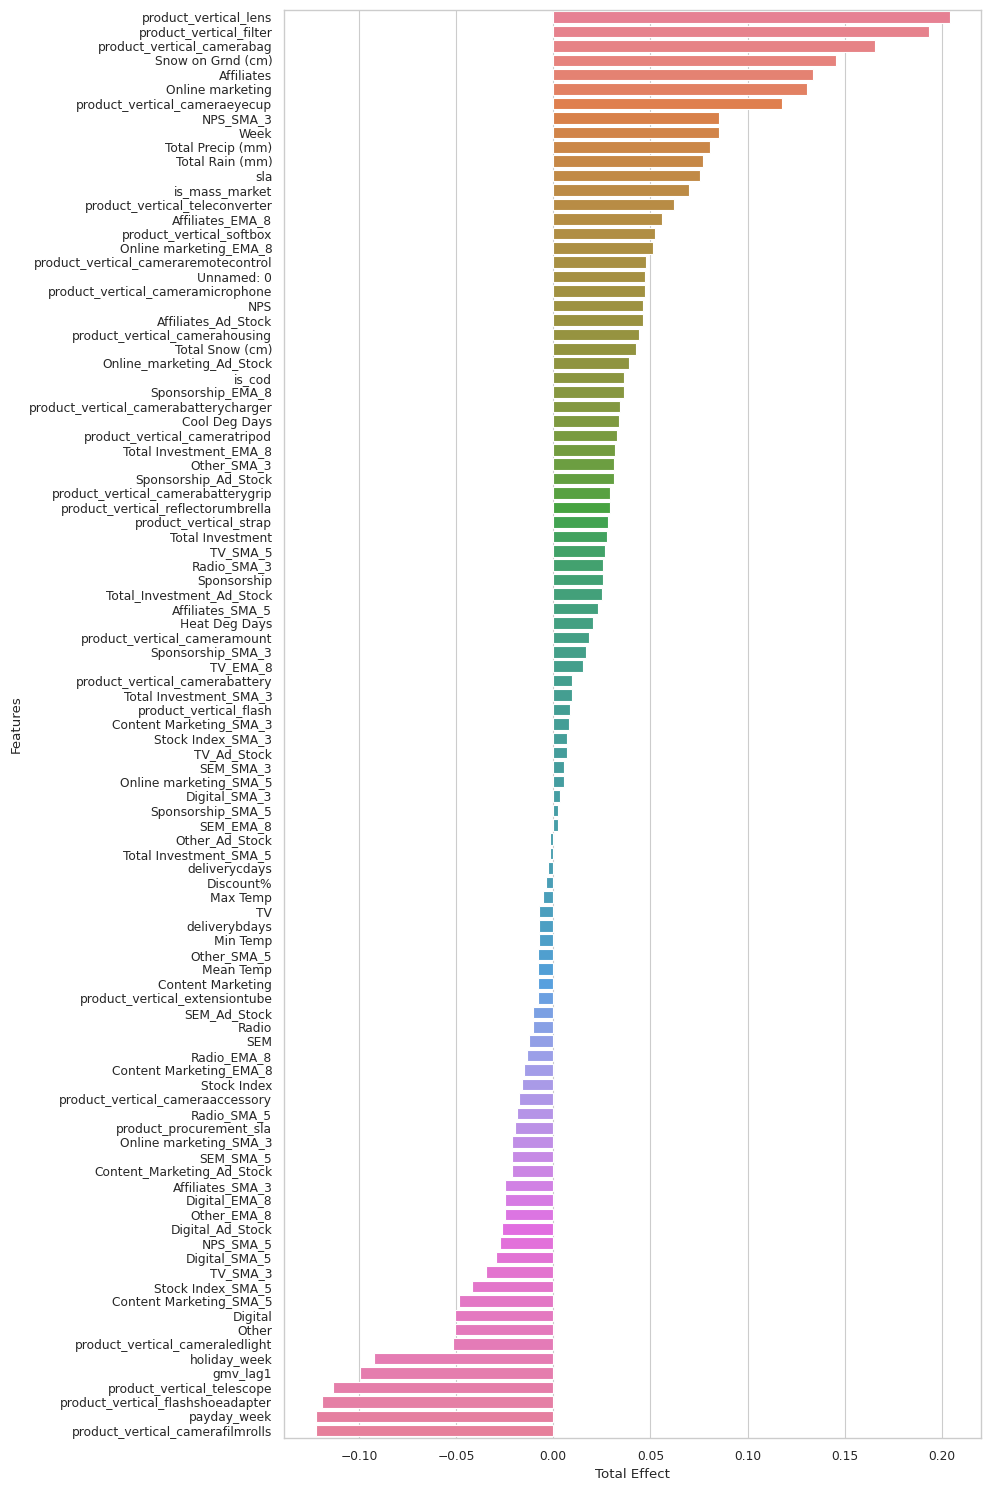

In [150]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Total Effect', palette='husl', data=cameraaccessory_lr_coef_df, estimator=np.sum)
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()